# Forest Data

In [1]:
#load the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [2]:
np.set_printoptions(suppress = True)

## Load the dataset

In [4]:
#load your own path here where the datasets reside
path = '../ten-datasets/'

#load the dataset into a dataframe
df_forestdata = pd.read_csv(path + 'Forest.csv')

In [8]:
#labels are in the last column, features are in the other columns
Y = df_forestdata.iloc[:,54]
X = df_forestdata.iloc[:,0:54]

In [9]:
#create 80/20 train/test split in the data using sklearn
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size =0.2, random_state = 0, stratify=Y)

In [10]:
#the following function gives some default classification metrics that can be re-used
def model_fit_report(model,x_values,y_values_actual,y_values_predicted,y_values_probability):
    print("Model Fit Results")
    print("")
    print ("Accuracy: %0.3f" % accuracy_score(y_values_actual,y_values_predicted))
    print("")
    print("Confusion Matrix")
    CM = plot_confusion_matrix(model,x_values,y_values_actual,values_format = 'n')
    print (CM)
    print("")
    print (confusion_matrix(y_values_actual,y_values_predicted))
    print("")
    print("Classification Report")
    print("")
    print (classification_report(y_values_actual,y_values_predicted))

    

In [11]:
#standardise the data
mms = MinMaxScaler()
x_train_scaled = mms.fit_transform(x_train)
x_test_scaled = mms.fit_transform(x_test)

## Logistic Regression

Model Fit Results

Accuracy: 0.674

Confusion Matrix

[[143456  20681     72      0     27    270   4966]
 [ 87749 132041   2013     22    260   3954    601]
 [     0   3007  18452   1193     32   5919      0]
 [     0     16    732   1267      0    183      0]
 [   543   6590    189      0    202     70      0]
 [    24   2135   4456    214     25   7040      0]
 [  5392    107      0      0      0      0  10909]]

Classification Report

              precision    recall  f1-score   support

           1       0.60      0.85      0.71    169472
           2       0.80      0.58      0.68    226640
           3       0.71      0.65      0.68     28603
           4       0.47      0.58      0.52      2198
           5       0.37      0.03      0.05      7594
           6       0.40      0.51      0.45     13894
           7       0.66      0.66      0.66     16408

    accuracy                           0.67    464809
   macro avg       0.58      0.55      0.53    464809
weighted avg   

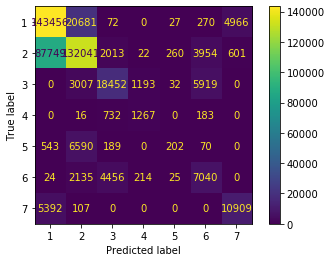

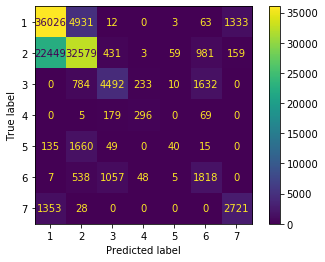

In [12]:
#start with a default logistic regression with no regularisation (C=100)

lr = LogisticRegression(C=100,max_iter = 100, tol=.1,solver='sag')
lr.fit(x_train_scaled,y_train)

#need to add 1 to the assigned class, otherwise the classes start from zero which isn't correct.
y_train_predict = lr.predict_proba(x_train_scaled).argmax(axis = 1)+1
model_fit_report(lr,x_train_scaled,y_train,y_train_predict,lr.predict_proba(x_train_scaled))

#get results for test dataset
y_test_predict = lr.predict_proba(x_test_scaled).argmax(axis = 1)+1
model_fit_report(lr,x_test_scaled,y_test,y_test_predict,lr.predict_proba(x_test_scaled))

### Optimising Regularisation ('C')

In [15]:
#define the values of C to test and then use validation_curve from sklearn to evaluate
parameter_range = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(estimator = lr, X=x_train_scaled, y=y_train, param_name ='C',param_range=parameter_range,cv=15)

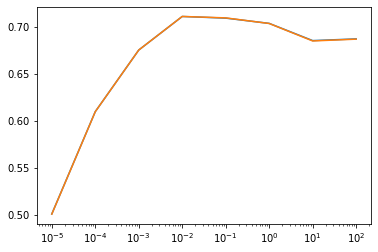

In [16]:

#obtain the mean results from the samples
train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

#plot the results
plt.plot(parameter_range,train_mean)
plt.plot(parameter_range,test_mean)
plt.xscale('log')

Not sure why the training results decrease in line with validation results. Was expecting train results to get
better with increasing C (ie training should overfit)

Model Fit Results

Accuracy: 0.707

Confusion Matrix

[[110455  56882    133      0      0      0   2002]
 [ 35195 186528   4367      8     59    257    226]
 [     0   3589  24301    411      1    301      0]
 [     0      0   1527    516      0    155      0]
 [    43   7083    465      0      3      0      0]
 [     0   5163   8213     85      5    428      0]
 [  9588    225      2      0      0      0   6593]]

Classification Report

              precision    recall  f1-score   support

           1       0.71      0.65      0.68    169472
           2       0.72      0.82      0.77    226640
           3       0.62      0.85      0.72     28603
           4       0.51      0.23      0.32      2198
           5       0.04      0.00      0.00      7594
           6       0.38      0.03      0.06     13894
           7       0.75      0.40      0.52     16408

    accuracy                           0.71    464809
   macro avg       0.53      0.43      0.44    464809
weighted avg   

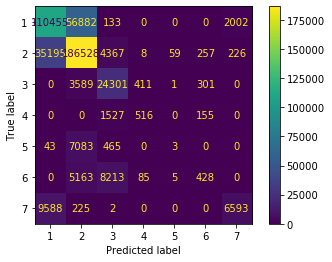

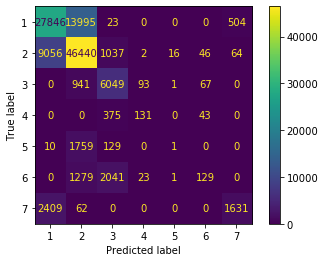

In [17]:
#find the test value with highest accuracy score and corresponding parameter as the optimal C value
optimal_C = parameter_range[test_mean.argmax()]
#and then use that in the final logistic regression
lr = LogisticRegression(C=optimal_C,max_iter = 100, tol=1,solver='sag')
lr.fit(x_train_scaled,y_train)
#need to add 1 to the assigned class, otherwise the classes start from zero which isn't correct.
y_train_predict = lr.predict_proba(x_train_scaled).argmax(axis = 1)+1
model_fit_report(lr,x_train_scaled,y_train,y_train_predict,lr.predict_proba(x_train_scaled))
#get results for test dataset
y_test_predict = lr.predict_proba(x_test_scaled).argmax(axis = 1)+1
model_fit_report(lr,x_test_scaled,y_test,y_test_predict,lr.predict_proba(x_test_scaled))

In [ ]:
#lr.get_params().keys()

## Logistc Regression with PCA

In [18]:
#get the principal components from the scaled data and use that in the logistic regression
from sklearn.decomposition import PCA
pca = PCA(n_components = 12) #n_components is estimated from commented out section below
x_train_pca = pca.fit_transform(x_train_scaled)
lr.fit(x_train_pca,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=1, verbose=0,
                   warm_start=False)

Model Fit Results

Accuracy: 0.592

Confusion Matrix

[[ 53411 115684      0      0      0      0    377]
 [ 21112 202626   2575      0      0      0    327]
 [     0  10639  17964      0      0      0      0]
 [     0      0   2198      0      0      0      0]
 [   174   7420      0      0      0      0      0]
 [     0   5845   8049      0      0      0      0]
 [  6747   8648      0      0      0      0   1013]]

Classification Report



/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.66      0.32      0.43    169472
           2       0.58      0.89      0.70    226640
           3       0.58      0.63      0.60     28603
           4       0.00      0.00      0.00      2198
           5       0.00      0.00      0.00      7594
           6       0.00      0.00      0.00     13894
           7       0.59      0.06      0.11     16408

    accuracy                           0.59    464809
   macro avg       0.34      0.27      0.26    464809
weighted avg       0.58      0.59      0.54    464809

Model Fit Results

Accuracy: 0.551

Confusion Matrix

[[11766 28154   143     0     0     0  2305]
 [ 4349 48072  1548     0     0     0  2692]
 [    0  3023  4128     0     0     0     0]
 [    0    29   520     0     0     0     0]
 [   25  1793    14     0     0     0    67]
 [    0  1258  2202     0     0     0    13]
 [ 1204  2859     0     0     0     0    39]]

Classification Report



/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.68      0.28      0.39     42368
           2       0.56      0.85      0.68     56661
           3       0.48      0.58      0.53      7151
           4       0.00      0.00      0.00       549
           5       0.00      0.00      0.00      1899
           6       0.00      0.00      0.00      3473
           7       0.01      0.01      0.01      4102

    accuracy                           0.55    116203
   macro avg       0.25      0.24      0.23    116203
weighted avg       0.55      0.55      0.51    116203



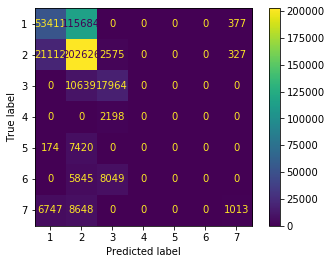

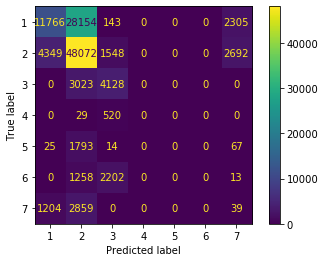

In [19]:
#get results for training dataset
y_train_predict = lr.predict_proba(x_train_pca).argmax(axis = 1)+1
model_fit_report(lr,x_train_pca,y_train,y_train_predict,lr.predict_proba(x_train_pca))

#get results for test dataset
x_test_pca = pca.fit_transform(x_test_scaled)
y_test_predict = lr.predict_proba(x_test_pca).argmax(axis = 1)+1
model_fit_report(lr,x_test_pca,y_test,y_test_predict,lr.predict_proba(x_test_pca))



Results using PCA appear worse than using all features. 

In [20]:
#The following is useful to get an idea of how many principle components might be appropriate

#pca = PCA(n_components = None)
#x_train_pca = pca.fit_transform(x_train_scaled)
#print(pca.explained_variance_ratio_)

## Random Forest

Model Fit Results

Accuracy: 0.688

Confusion Matrix

[[116273  53199      0      0      0      0      0]
 [ 37543 187340   1757      0      0      0      0]
 [     1  12631  15969      0      0      2      0]
 [     0    513   1681      0      0      4      0]
 [    23   7571      0      0      0      0      0]
 [     2   7317   6572      0      0      3      0]
 [ 16093    315      0      0      0      0      0]]

Classification Report



/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.68      0.69      0.69    169472
           2       0.70      0.83      0.76    226640
           3       0.61      0.56      0.59     28603
           4       0.00      0.00      0.00      2198
           5       0.00      0.00      0.00      7594
           6       0.33      0.00      0.00     13894
           7       0.00      0.00      0.00     16408

    accuracy                           0.69    464809
   macro avg       0.33      0.30      0.29    464809
weighted avg       0.64      0.69      0.65    464809

Model Fit Results

Accuracy: 0.688

Confusion Matrix

[[29102 13266     0     0     0     0     0]
 [ 9246 46999   416     0     0     0     0]
 [    0  3248  3903     0     0     0     0]
 [    0   131   417     0     0     1     0]
 [    5  1893     1     0     0     0     0]
 [    1  1822  1649     0     0     1     0]
 [ 4019    83     0     0     0     0     0]]

Classification Report

         

/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.18908297, 0.06433156, 0.06036156, 0.06596242, 0.06022224,
       0.08117538, 0.06604771, 0.06583214, 0.0654998 , 0.07052545,
       0.01289806, 0.00627579, 0.01433086, 0.03249941, 0.00163669,
       0.00842392, 0.00357241, 0.00970373, 0.00073579, 0.00334985,
       0.        , 0.        , 0.00022997, 0.01297152, 0.00255024,
       0.00730619, 0.00480701, 0.00077801, 0.        , 0.00166653,
       0.00292534, 0.00060976, 0.00108451, 0.0023953 , 0.00019551,
       0.00920233, 0.01186809, 0.00373312, 0.        , 0.00042253,
       0.00023412, 0.00046109, 0.01011247, 0.00606287, 0.00365182,
       0.0066632 , 0.00506868, 0.00025053, 0.00185191, 0.        ,
       0.00015654, 0.0092414 , 0.00730578, 0.00372591])

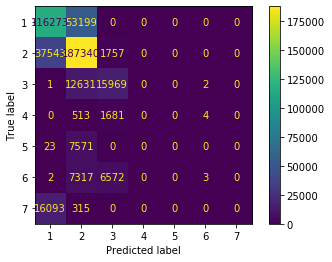

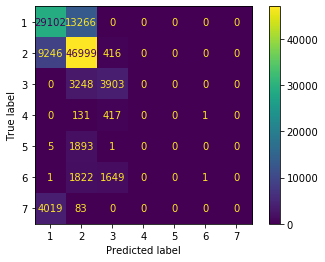

In [21]:
#setup and train the forest. The n_estimators of 100 is determined from the optimisation below
forest = RandomForestClassifier(criterion='gini', n_estimators = 100, random_state =1,max_samples =100)
forest.fit(x_train,y_train)

#get the training results
y_train_predict = forest.predict(x_train)
model_fit_report(forest,x_train,y_train,y_train_predict,forest.predict_proba(x_train_scaled))

#get the test results
y_test_predict = forest.predict(x_test)
model_fit_report(forest,x_test,y_test,y_test_predict,forest.predict_proba(x_test))

#just for interest, understand what features are dominating
importances = forest.feature_importances_
importances


### Optimise the number of trees (n_estimators)

In [22]:
parameter_range = [10,25,50,75,100,150]
train_scores, test_scores = validation_curve(estimator = forest, X=x_train, y=y_train, param_name ='n_estimators',param_range=parameter_range,cv=10)

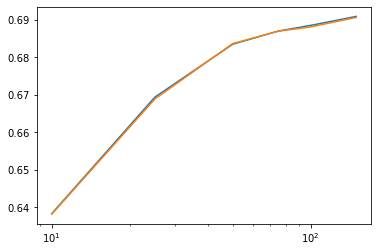

In [23]:
train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
plt.plot(parameter_range,train_mean)
plt.plot(parameter_range,test_mean)
plt.xscale('log')


### MLP with Keras

In [24]:
import tensorflow.keras as keras

/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Tommy/opt/anaconda3/e

In [25]:
#convert labels to binary format
from keras.utils import to_categorical
from keras.layers import Dropout
y_train_binary = to_categorical(y_train)

Using TensorFlow backend.


### Two Layer, 100 Unit MLP

In [26]:
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        units = 100, 
        input_dim = x_train_scaled.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu')



model.add(
    keras.layers.Dense(
        units = 100, 
        input_dim = 100,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu')

model.add(Dropout(0.5))

model.add(
    keras.layers.Dense(
    units=y_train_binary.shape[1],
    input_dim=100,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activation ='softmax'))


sgd_optimiser = keras.optimizers.SGD(
    lr=0.0001)

#model.compile(optimizer=sgd_optimiser,loss ='categorical_crossentropy')
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(x_train,y_train_binary,batch_size=50,epochs =10, verbose =1, validation_split = 0.1)

#training results
y_train_predict = model.predict_classes(x_train,verbose=0)
print ("Keras MLP Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
print(confusion_matrix(y_train,y_train_predict))
#testing results
y_test_predict = model.predict_classes(x_test,verbose=0)
print ("Keras MLP Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))
print(confusion_matrix(y_test,y_test_predict))

SyntaxError: invalid syntax (<ipython-input-26-28460cf8e098>, line 13)

### Two Layer, 200 Unit MLP

In [ ]:
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        units = 200, 
        input_dim = x_train_scaled.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))

model.add(
    keras.layers.Dense(
        units = 200, 
        input_dim = 200,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))


model.add(
    keras.layers.Dense(
    units=y_train_binary.shape[1],
    input_dim=200,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activation ='softmax'))


sgd_optimiser = keras.optimizers.SGD(
    lr=0.0001)

#model.compile(optimizer=sgd_optimiser,loss ='categorical_crossentropy')
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(x_train,y_train_binary,batch_size=50,epochs =10, verbose =1, validation_split = 0.1)

#training results
y_train_predict = model.predict_classes(x_train,verbose=0)
print ("Keras MLP Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
print(confusion_matrix(y_train,y_train_predict))
#testing results
y_test_predict = model.predict_classes(x_test,verbose=0)
print ("Keras MLP Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))
print(confusion_matrix(y_test,y_test_predict))

### Two Layer, 300 Unit MLP

In [ ]:
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        units = 300, 
        input_dim = x_train_scaled.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))

model.add(
    keras.layers.Dense(
        units = 300, 
        input_dim = 300,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))


model.add(
    keras.layers.Dense(
    units=y_train_binary.shape[1],
    input_dim=300,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activation ='softmax'))


sgd_optimiser = keras.optimizers.SGD(
    lr=0.0001)

#model.compile(optimizer=sgd_optimiser,loss ='categorical_crossentropy')
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(x_train,y_train_binary,batch_size=50,epochs =10, verbose =1, validation_split = 0.1)

#training results
y_train_predict = model.predict_classes(x_train,verbose=0)
print ("Keras MLP Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
print(confusion_matrix(y_train,y_train_predict))
#testing results
y_test_predict = model.predict_classes(x_test,verbose=0)
print ("Keras MLP Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))
print(confusion_matrix(y_test,y_test_predict))

### Three Layer, 100 Unit MLP

In [ ]:
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        units = 100, 
        input_dim = x_train_scaled.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))

model.add(
    keras.layers.Dense(
        units = 100, 
        input_dim = 100,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))

model.add(
    keras.layers.Dense(
        units = 100, 
        input_dim = 100,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))


model.add(
    keras.layers.Dense(
    units=y_train_binary.shape[1],
    input_dim=100,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activation ='softmax'))


sgd_optimiser = keras.optimizers.SGD(
    lr=0.0001)

#model.compile(optimizer=sgd_optimiser,loss ='categorical_crossentropy')
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(x_train,y_train_binary,batch_size=50,epochs =10, verbose =1, validation_split = 0.1)

#training results
y_train_predict = model.predict_classes(x_train,verbose=0)
print ("Keras MLP Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
print(confusion_matrix(y_train,y_train_predict))
#testing results
y_test_predict = model.predict_classes(x_test,verbose=0)
print ("Keras MLP Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))
print(confusion_matrix(y_test,y_test_predict))

### Four Layer, 100 unit MLP

In [ ]:
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        units = 100, 
        input_dim = x_train_scaled.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))

model.add(
    keras.layers.Dense(
        units = 100, 
        input_dim = 100,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))

model.add(
    keras.layers.Dense(
        units = 100, 
        input_dim = 100,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))

model.add(
    keras.layers.Dense(
        units = 100, 
        input_dim = 100,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))


model.add(
    keras.layers.Dense(
    units=y_train_binary.shape[1],
    input_dim=100,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activation ='softmax'))


sgd_optimiser = keras.optimizers.SGD(
    lr=0.0001)

#model.compile(optimizer=sgd_optimiser,loss ='categorical_crossentropy')
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(x_train,y_train_binary,batch_size=50,epochs =10, verbose =1, validation_split = 0.1)

#training results
y_train_predict = model.predict_classes(x_train,verbose=0)
print ("Keras MLP Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
print(confusion_matrix(y_train,y_train_predict))
#testing results
y_test_predict = model.predict_classes(x_test,verbose=0)
print ("Keras MLP Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))
print(confusion_matrix(y_test,y_test_predict))


In [ ]:
list(zip(y_train,y_train_predict))